In [66]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import sys
from sklearn.preprocessing import StandardScaler
from scipy.stats.mstats import winsorize

In [67]:
%store -r df

In [68]:
from sklearn.feature_selection import mutual_info_classif
target_variable = 'smoking'
features = ['age', 'relaxation', 'Gtp', 'triglyceride', 'eyesight(left)', 'ALT', 'height(cm)', 'weight(kg)', 'waist(cm)', 'systolic', 'HDL', 'hemoglobin']

# Create target variable (y) and feature matrix (X)
y = df[target_variable]
X = df[features]

# Calculate information gain
information_gain = mutual_info_classif(X, y)
feature_info_gain = pd.Series(information_gain, index=features).sort_values(ascending=False)

# Print or visualize feature importance
print(feature_info_gain)

height(cm)        0.137347
hemoglobin        0.133635
Gtp               0.102486
weight(kg)        0.080377
triglyceride      0.076998
waist(cm)         0.041560
HDL               0.041495
ALT               0.031315
age               0.024345
relaxation        0.014779
eyesight(left)    0.011634
systolic          0.008362
dtype: float64


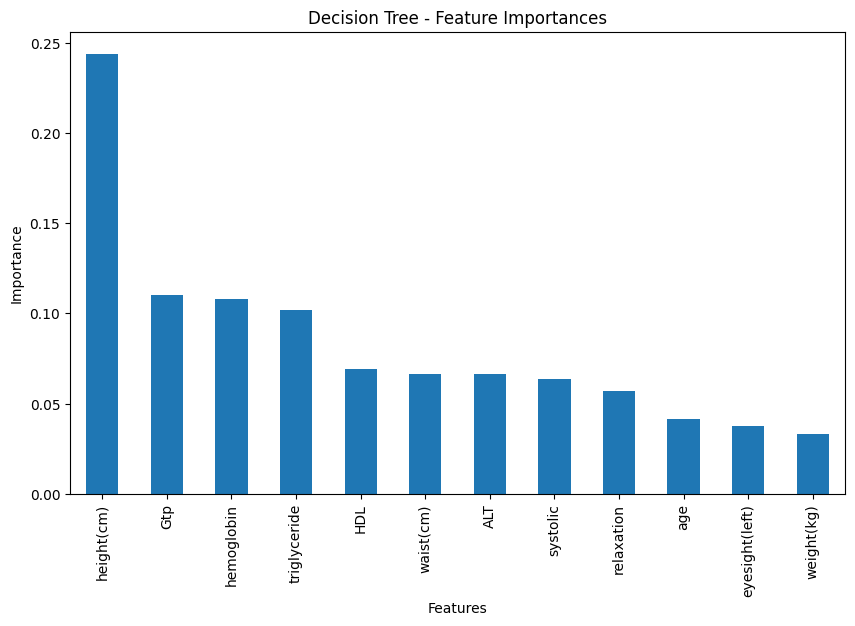

In [69]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Decision Tree classifier
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)

# Get feature importances
feature_importances = tree_model.feature_importances_

# Create a pandas Series for better visualization
feature_importance_series = pd.Series(feature_importances, index=features).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
feature_importance_series.plot(kind='bar')
plt.title('Decision Tree - Feature Importances')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()

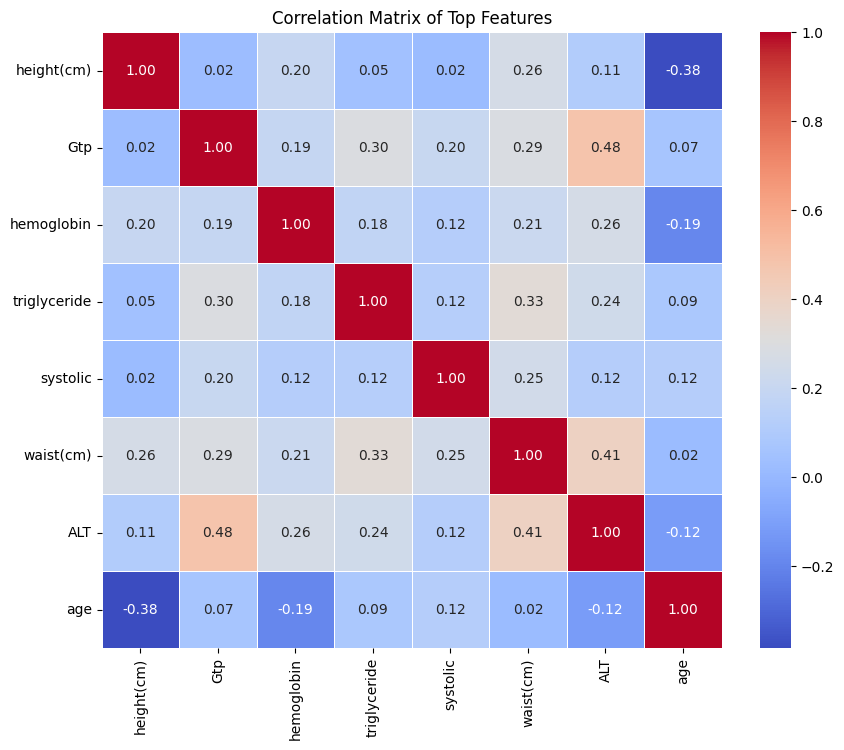

In [70]:
selected_features = ['height(cm)','Gtp', 'hemoglobin', 'triglyceride', 'systolic', 'waist(cm)','ALT','age']
extracted_features = df.loc[df['smoking'] == 1, selected_features].copy()
# Calculate correlation matrix
correlation_matrix = extracted_features.corr()

# Plotting the correlation matrix as a heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Top Features')
plt.show()

<class 'pandas.core.frame.DataFrame'>
Index: 44676 entries, 2 to 101922
Data columns (total 9 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   height(cm)                       44676 non-null  float64
 1   Gtp                              44676 non-null  float64
 2   hemoglobin                       44676 non-null  float64
 3   triglyceride                     44676 non-null  float64
 4   systolic                         44676 non-null  float64
 5   waist(cm)                        44676 non-null  float64
 6   ALT                              44676 non-null  float64
 7   age                              44676 non-null  float64
 8   systolic_waist_size_interaction  44676 non-null  float64
dtypes: float64(9)
memory usage: 3.4 MB


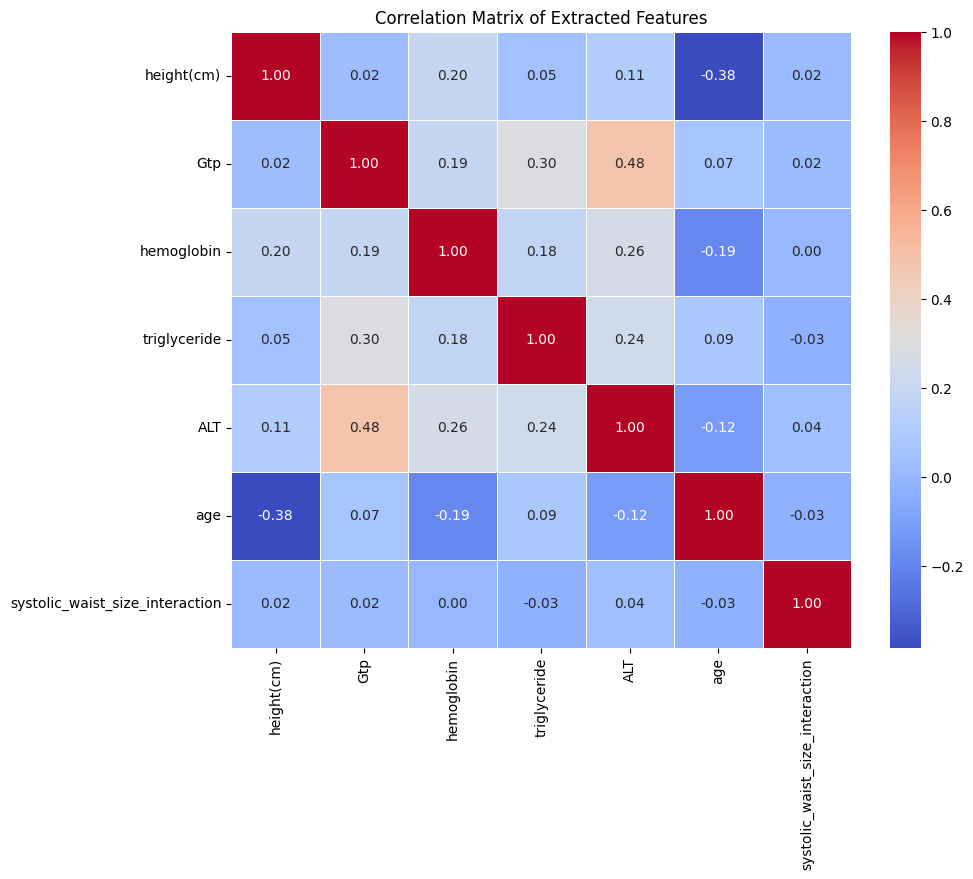

In [71]:
import seaborn as sns
extracted_features['systolic_waist_size_interaction'] = extracted_features['waist(cm)'] * extracted_features['systolic']
extracted_features.info()
extracted_features.drop(['systolic', 'waist(cm)'], axis=1, inplace=True)
correlation_matrix = extracted_features.corr()

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Extracted Features')
plt.show()


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


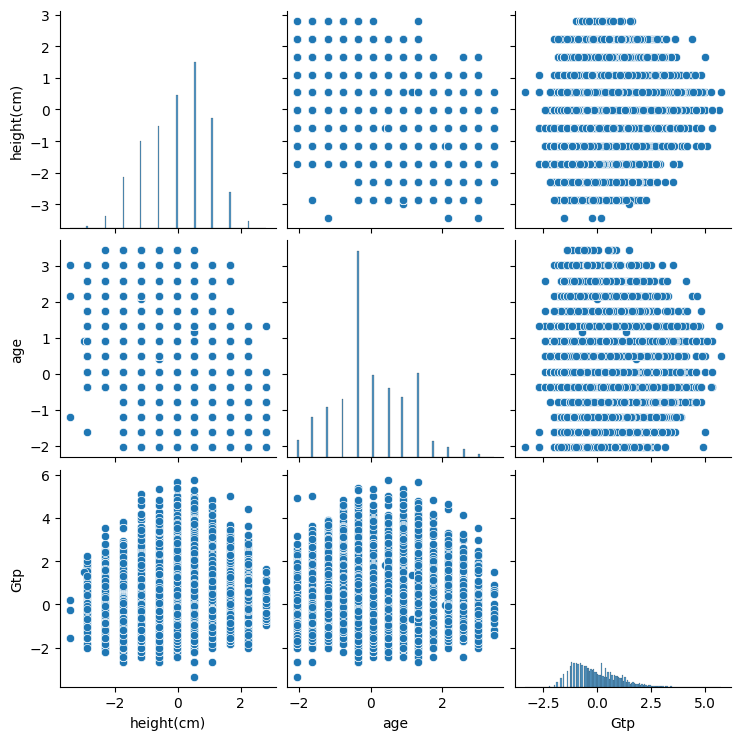

In [72]:
numeric_features = ['height(cm)','age','Gtp']
sns.pairplot(data=df[numeric_features])
plt.show()

In [73]:
# Log transform skewed numeric features
from sklearn.preprocessing import FunctionTransformer
skewed_features = ['hemoglobin', 'triglyceride', 'systolic', 'waist(cm)']
df[skewed_features] = FunctionTransformer(np.log1p).fit_transform(df[skewed_features])

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/pandas/core/internals/blocks.py:329: RuntimeWarning: invalid value encountered in log1p
  result = func(self.values, **kwargs)


In [74]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[numeric_features])
df[numeric_features] = scaled_features


In [75]:
# winsorize the data(it drops the outliers)
df['height_winsorized'] = winsorize(df['height(cm)'], limits=[0.05, 0.05])
df['age_winsorized'] = winsorize(df['age'], limits=[0.05, 0.05])
df['waist_winsorized'] = winsorize(df['waist(cm)'], limits=[0.05, 0.05])
df['Gtp_winsorized'] = winsorize(df['Gtp'], limits=[0.05, 0.05])
df['triglyceride_winsorized'] = winsorize(df['triglyceride'], limits=[0.05, 0.05])
df['systolic_winsorized'] = winsorize(df['systolic'], limits=[0.05, 0.05])
df['hemoglobin_winsorized'] = winsorize(df['hemoglobin'], limits=[0.05, 0.05])

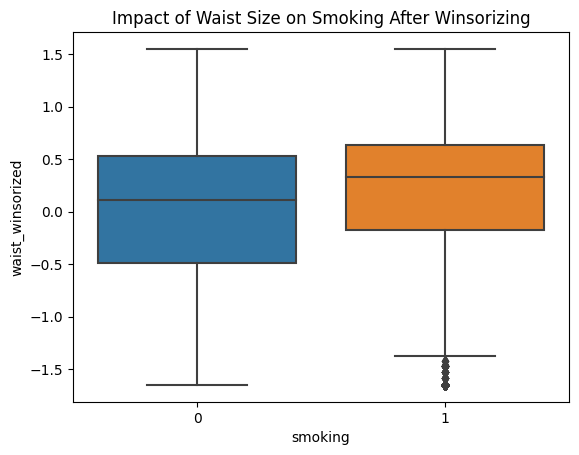

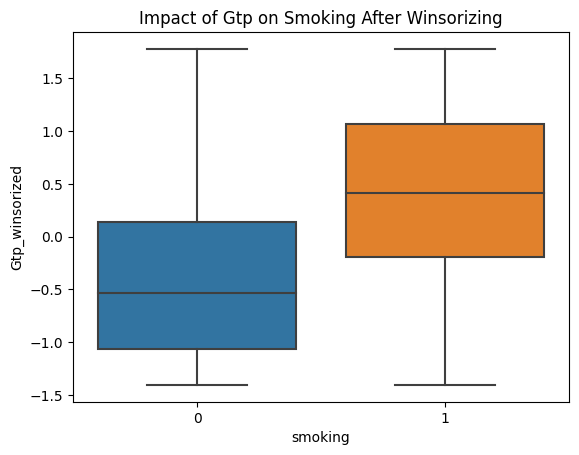

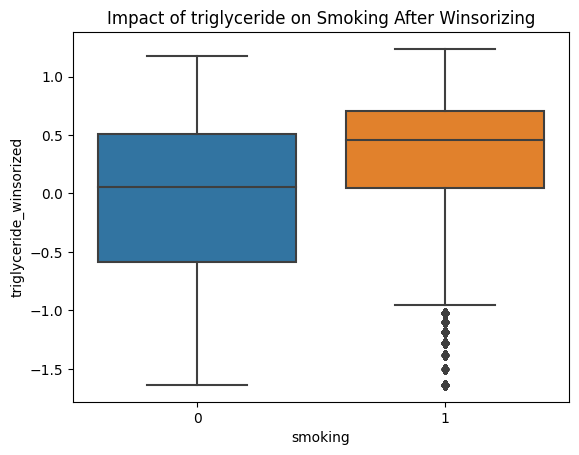

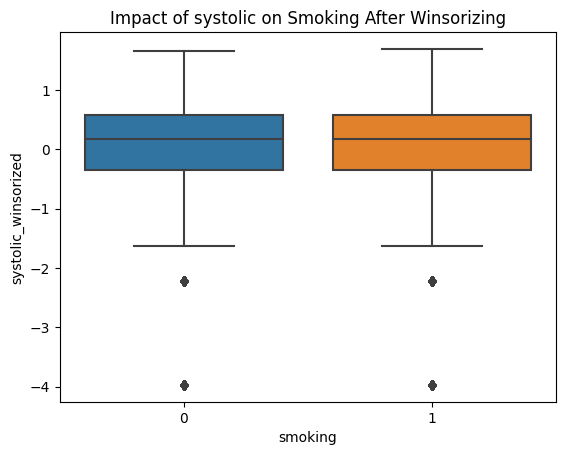

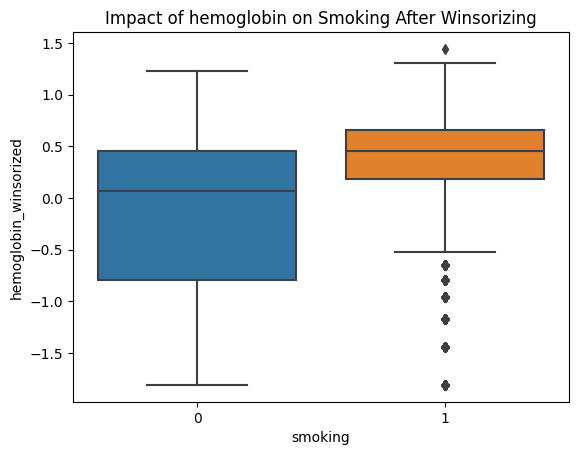

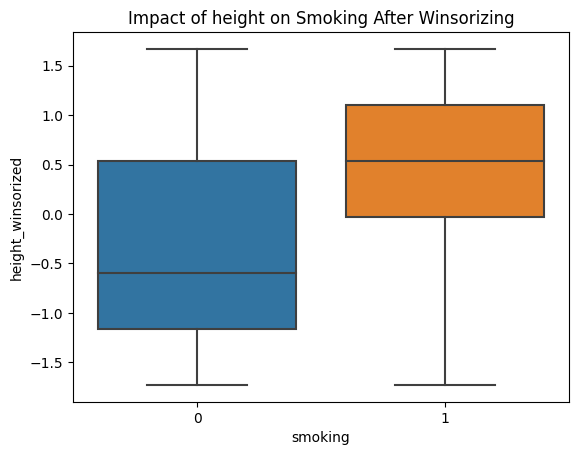

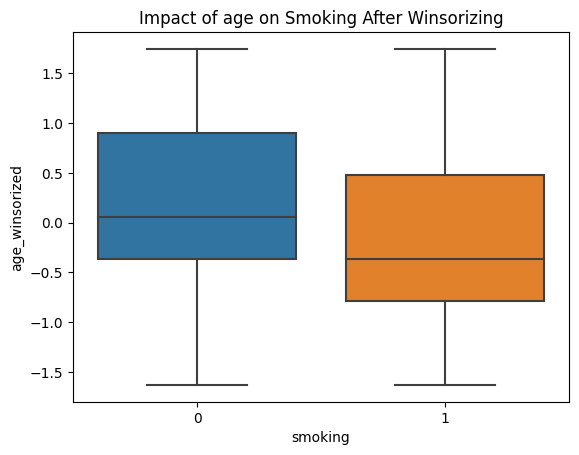

In [76]:
sns.boxplot(x='smoking', y='waist_winsorized', data=df)
plt.title('Impact of Waist Size on Smoking After Winsorizing')
plt.show()
sns.boxplot(x='smoking', y='Gtp_winsorized', data=df)
plt.title('Impact of Gtp on Smoking After Winsorizing')
plt.show()
sns.boxplot(x='smoking', y='triglyceride_winsorized', data=df)
plt.title('Impact of triglyceride on Smoking After Winsorizing')
plt.show()
sns.boxplot(x='smoking', y='systolic_winsorized', data=df)
plt.title('Impact of systolic on Smoking After Winsorizing')
plt.show()
sns.boxplot(x='smoking', y='hemoglobin_winsorized', data=df)
plt.title('Impact of hemoglobin on Smoking After Winsorizing')
plt.show()

sns.boxplot(x='smoking', y='height_winsorized', data=df)
plt.title('Impact of height on Smoking After Winsorizing')
plt.show()
sns.boxplot(x='smoking', y='age_winsorized', data=df)
plt.title('Impact of age on Smoking After Winsorizing')
plt.show()

In [77]:
new_def=df[['smoking','waist_winsorized','Gtp_winsorized','triglyceride_winsorized','systolic_winsorized','hemoglobin_winsorized','height_winsorized','age_winsorized']]

%store new_def
new_def.describe()

Stored 'new_def' (DataFrame)


,smoking,waist_winsorized,Gtp_winsorized,triglyceride_winsorized,systolic_winsorized,hemoglobin_winsorized,height_winsorized,age_winsorized
count,101923.000000,86317.000000,101923.000000,85587.000000,88988.000000,86757.000000,101923.000000,101923.000000
mean,0.438331,0.057290,-0.017150,0.077778,-0.223386,0.069734,0.006977,-0.010963
std,0.496185,0.724434,0.912096,0.721478,1.307542,0.726130,0.960340,0.933383
min,0.000000,-1.650622,-1.403646,-1.637406,-3.970792,-1.808175,-1.729594,-1.628997
25%,0.000000,-0.315054,-0.775959,-0.313598,-0.349313,-0.222037,-0.596508,-0.364413
50%,0.000000,0.249376,-0.134583,0.313303,0.167298,0.325564,-0.029965,-0.364413
75%,1.000000,0.585674,0.650185,0.619003,0.573358,0.558638,0.536578,0.900172
max,1.000000,1.551226,1.778190,1.236494,1.691578,1.441045,1.669664,1.743228


<Figure size 1200x600 with 0 Axes>

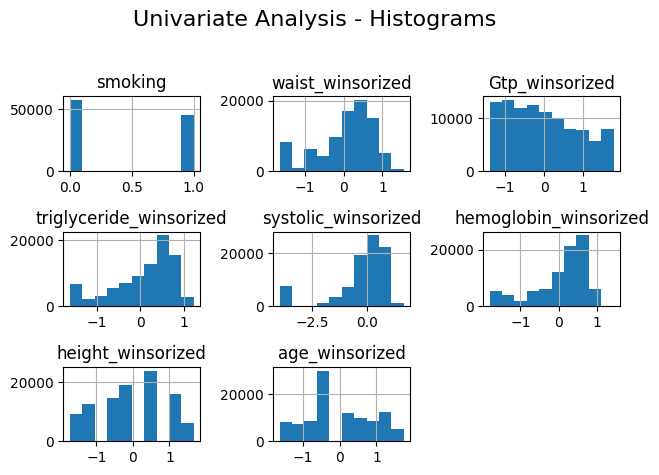

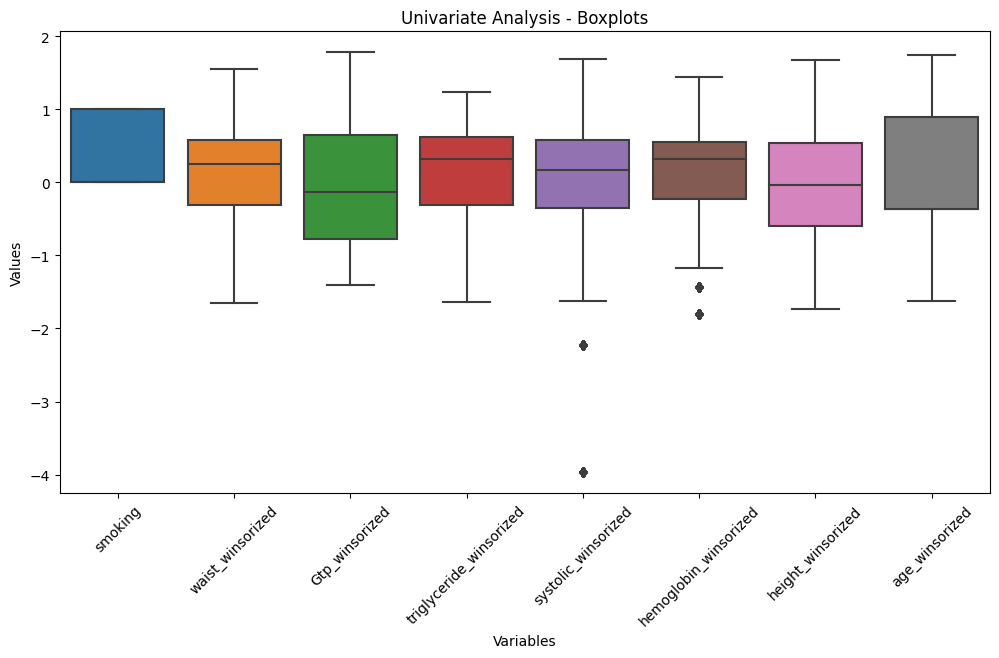

             smoking  waist_winsorized  Gtp_winsorized  \
count  101923.000000      86317.000000   101923.000000   
mean        0.438331          0.057290       -0.017150   
std         0.496185          0.724434        0.912096   
min         0.000000         -1.650622       -1.403646   
25%         0.000000         -0.315054       -0.775959   
50%         0.000000          0.249376       -0.134583   
75%         1.000000          0.585674        0.650185   
max         1.000000          1.551226        1.778190   

       triglyceride_winsorized  systolic_winsorized  hemoglobin_winsorized  \
count             85587.000000         88988.000000           86757.000000   
mean                  0.077778            -0.223386               0.069734   
std                   0.721478             1.307542               0.726130   
min                  -1.637406            -3.970792              -1.808175   
25%                  -0.313598            -0.349313              -0.222037   
50%      

In [78]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate descriptive statistics
statistics = new_def.describe()

plt.figure(figsize=(12, 6))
new_def.hist()
plt.suptitle('Univariate Analysis - Histograms', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()
plt.figure(figsize=(12, 6))
sns.boxplot(data=new_def)
plt.title('Univariate Analysis - Boxplots')
plt.xlabel('Variables')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.show()

# Print descriptive statistics
print(statistics)
